Claro! Aqui está um resumo do código em até 10 tópicos:

1. **Importa os dados de transações** de um arquivo CSV.  
2. **Define anomalias reais** como transações não isentas com taxa acima de 20.  
3. **Cria novas variáveis (features)**: taxa relativa e Z-score da taxa cobrada.  
4. **Seleciona variáveis explicativas** e define o rótulo binário de anomalia.  
5. **Divide os dados** em treino e teste com estratificação nas anomalias.  
6. **Normaliza os dados** com `StandardScaler` para padronização.  
7. **Treina o modelo Isolation Forest** ajustando contaminação pela proporção real de anomalias.  
8. **Aplica o modelo** a todos os dados e marca predições de anomalias.  
9. **Filtra apenas transações não isentas** para avaliação do desempenho.  
10. **Calcula métricas de avaliação**: Precisão, Recall e F1-Score.

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

## 1. Importar os dados existentes
df = pd.read_csv("transacoes_paysmart.csv")

## 2. Definir anomalias (considerando apenas Taxa_Cobrada acima do esperado)
# Vamos considerar como anomalias valores acima de 30 (ajuste conforme necessário)
limite_anomalia = 20
df['Anomalia_Real'] = np.where((df['Taxa_Cobrada'] > limite_anomalia) & (df['Isenção_Aplicada'] == 'Não'), 1, 0)

# 3. Engenharia de features
# Criar features relevantes para detecção de anomalias
df['Taxa_Relativa'] = df['Taxa_Cobrada'] / df['Valor_Transação']
df['Taxa_Std'] = (df['Taxa_Cobrada'] - df['Taxa_Cobrada'].mean()) / df['Taxa_Cobrada'].std()

# Selecionar features para o modelo
features = ['Valor_Transação', 'Taxa_Cobrada', 'Taxa_Relativa', 'Taxa_Std']
X = df[features]
y = df['Anomalia_Real']

## 4. Divisão estratificada dos dados (mantendo proporção de anomalias)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

## 5. Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Modelo Isolation Forest otimizado
model = IsolationForest(
    n_estimators=300,
    contamination=len(df[df['Anomalia_Real'] == 1])/len(df),  # Proporção real de anomalias
    max_samples=128,
    random_state=42,
    verbose=1
)
model.fit(X_train_scaled)

## 7. Predição
df['Anomalia_Predita'] = model.predict(scaler.transform(X))
df['Anomalia_Predita'] = np.where(df['Anomalia_Predita'] == -1, 1, 0)

## 8. Avaliação (apenas para transações não isentas)
df_avaliacao = df[df['Isenção_Aplicada'] == 'Não']
y_true = df_avaliacao['Anomalia_Real']
y_pred = df_avaliacao['Anomalia_Predita']

print("\n=== Métricas de Avaliação ===")
print(f"Precisão: {precision_score(y_true, y_pred):.2f}")
print(f"Recall: {recall_score(y_true, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s



=== Métricas de Avaliação ===
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


Claro! Aqui vai o resumo em até **3 tópicos**:

1. **Visualiza os dados preditos**: cria dois gráficos de dispersão comparando transações normais e anômalas com base em "Taxa Cobrada" e "Taxa Relativa" em relação ao "Valor da Transação".  
2. **Diferencia visualmente as anomalias** com cores (azul para normal, vermelho para anomalia), facilitando a interpretação.  
3. **Salva os resultados completos** (com predições de anomalia) em um novo arquivo CSV e exibe mensagem de conclusão.

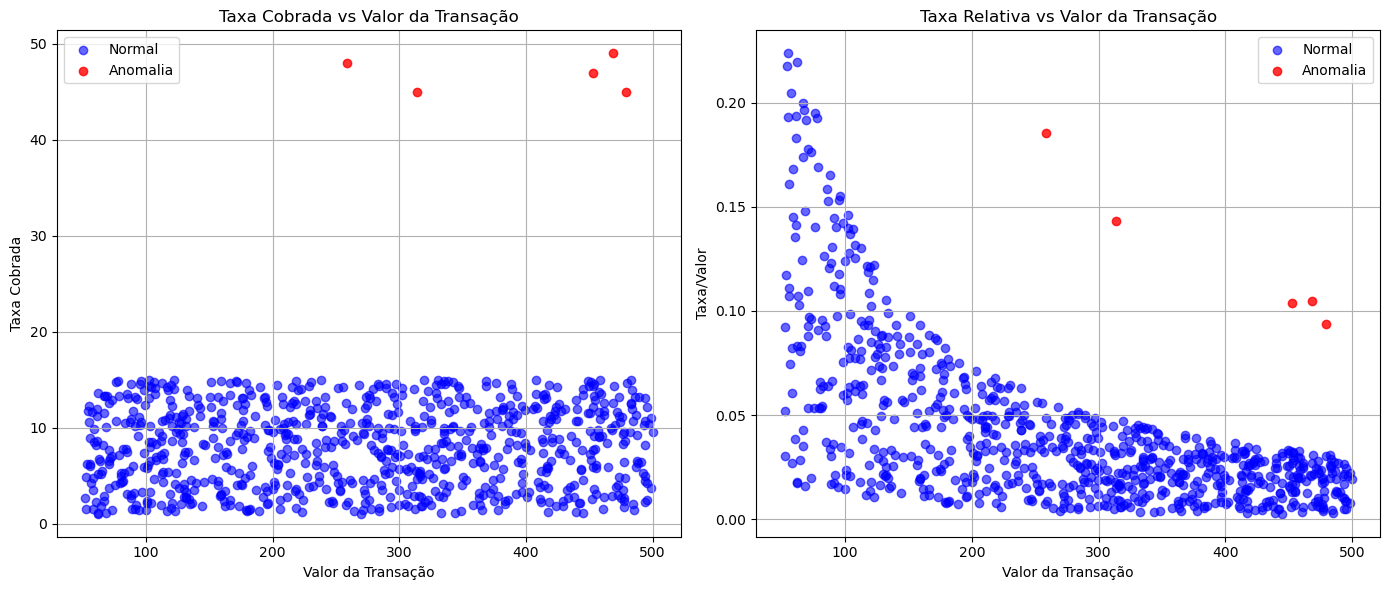


✅ Análise concluída e resultados salvos!


In [4]:
## 9. Visualização
plt.figure(figsize=(14, 6))

# Gráfico 1: Taxa Cobrada vs Valor da Transação
plt.subplot(1, 2, 1)
normal = df_avaliacao[df_avaliacao['Anomalia_Predita'] == 0]
anomalia = df_avaliacao[df_avaliacao['Anomalia_Predita'] == 1]

plt.scatter(normal['Valor_Transação'], normal['Taxa_Cobrada'], 
            color='blue', label='Normal', alpha=0.6)
plt.scatter(anomalia['Valor_Transação'], anomalia['Taxa_Cobrada'], 
            color='red', label='Anomalia', alpha=0.8)
plt.title('Taxa Cobrada vs Valor da Transação')
plt.xlabel('Valor da Transação')
plt.ylabel('Taxa Cobrada')
plt.legend()
plt.grid(True)

# Gráfico 2: Taxa Relativa vs Valor da Transação
plt.subplot(1, 2, 2)
plt.scatter(normal['Valor_Transação'], normal['Taxa_Relativa'], 
            color='blue', label='Normal', alpha=0.6)
plt.scatter(anomalia['Valor_Transação'], anomalia['Taxa_Relativa'], 
            color='red', label='Anomalia', alpha=0.8)
plt.title('Taxa Relativa vs Valor da Transação')
plt.xlabel('Valor da Transação')
plt.ylabel('Taxa/Valor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 10. Salvar resultados
df.to_csv("transacoes_com_anomalias_detectadas.csv", index=False)
print("\n✅ Análise concluída e resultados salvos!")